In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.metrics import Metric
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [42]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [43]:
print(train_x.shape)
print(test_y.shape)
print(test_x.shape)
print(test_y.shape)
class_name =['0', '1','2','3','4','5','6', '7','8','9','10']

(60000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


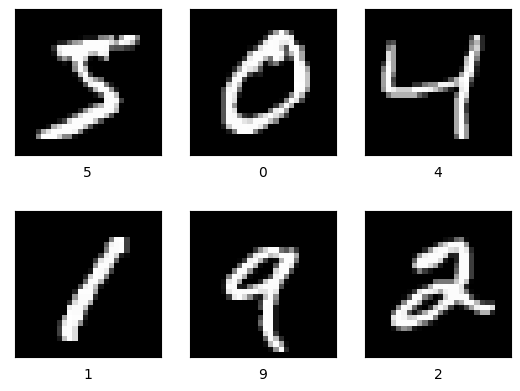

In [44]:
for i in range(6):  
    plt.subplot(2,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.xlabel(class_name[train_y[i]])
plt.show()

In [11]:
train_x = train_x/255
test_x = test_x/255

In [12]:
#One hot encoding
n_classes = 10
train_y = to_categorical(train_y, n_classes)
test_y = to_categorical(test_y, n_classes)

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(10))

In [46]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 2)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 2)         38        
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 2)          0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 3, 3, 2)           38        
                                                                 
 flatten_8 (Flatten)         (None, 18)              

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, 
                    validation_data=(test_x, test_y))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.5107 - accuracy: 0.2357 - val_loss: 1.7929 - val_accuracy: 0.3766
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4268 - accuracy: 0.5215 - val_loss: 0.8956 - val_accuracy: 0.7051
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7618 - accuracy: 0.7565 - val_loss: 0.6383 - val_accuracy: 0.7982
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6179 - accuracy: 0.8065 - val_loss: 0.5538 - val_accuracy: 0.8255
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5572 - accuracy: 0.8240 - val_loss: 0.5106 - val_accuracy: 0.8427
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5242 - accuracy: 0.8358 - val_loss: 0.4819 - val_accuracy: 0.8489
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5060 - accuracy: 0.8412 - val_loss: 0.4577 - val_acc